# Validation of connectivity

This notebook forms the basis of the connectivity validation.

## Start ipcluster to run in parallel
To run in parallel you need to first start ipcluster. On linux you type the following into the terminal, note that you should be in the same directory as this notebook is in.

```
export IPYTHONDIR="`pwd`/.ipython"
export IPYTHON_PROFILE=default
ipcluster start
```

These commands are in ```start_ipcluster.sh``` in the examples/notebook directory. After starting ipcluster give it a few seconds to get fully up and running before proceeding with the rest of the commands in this notebook.

If you restart the run you might need to do:

```
ipcluster stop
ipcluster start
```

For instructions how to install and activate ipyparallel for your notebook see https://github.com/ipython/ipyparallel

In [1]:
import os
from ipyparallel import Client

os.environ["IPYTHONDIR"] = ".ipython"
os.environ["IPYTHON_PROFILE"] = "default"

u_file = os.path.join(".ipython", "profile_default", "security", "ipcontroller-client.json")
if os.path.exists(u_file):
    rc = Client(url_file=u_file, timeout=120, debug=False)
else:
    print("Warning, running in serial.")
    rc = None

Warning, running in serial.


In [2]:

import os

network_path = os.path.join("networks/connectivity_validation")

from snudda import SnuddaInit
struct_def = {"Striatum": 2000 }

si = SnuddaInit(network_path=network_path, struct_def=struct_def, random_seed=1234)

Adding Striatum with 2000 neurons
Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/fs
Adding neurons: dSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/ispn
Adding neurons: ChIN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/chin
Checking boundaries, to make sure P is not too high
LTS axon density P([-0.0002], [-0.0001], [-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002], [-0.0001], [3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002], [0.0001], [-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002], [0.0001], [3.e-05]) = [1.84256218e-10]
LTS axon density P([0.0009], [-0.0001], [-3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009], [-0.0001], [3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009], [0.0001], 

In [3]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path, rc=rc)
sp.place()

In [4]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path, rc=rc)
sd.detect()

No d_view specified, running distribute neurons in serial
Processing hyper voxel : 36/125 (1838 neurons)
Processing hyper voxel : 31/125 (1821 neurons)
Processing hyper voxel : 56/125 (1731 neurons)
Processing hyper voxel : 61/125 (1715 neurons)
Processing hyper voxel : 32/125 (1442 neurons)
Processing hyper voxel : 37/125 (1436 neurons)
Processing hyper voxel : 62/125 (1328 neurons)
Processing hyper voxel : 57/125 (1324 neurons)
Processing hyper voxel : 30/125 (504 neurons)
Processing hyper voxel : 35/125 (484 neurons)
Processing hyper voxel : 55/125 (434 neurons)
Processing hyper voxel : 60/125 (426 neurons)
Processing hyper voxel : 6/125 (314 neurons)
Processing hyper voxel : 11/125 (313 neurons)
Processing hyper voxel : 26/125 (285 neurons)
Processing hyper voxel : 51/125 (244 neurons)
Processing hyper voxel : 66/125 (243 neurons)
Processing hyper voxel : 41/125 (227 neurons)
Processing hyper voxel : 86/125 (188 neurons)
Processing hyper voxel : 12/125 (184 neurons)
Processing hype

In [5]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path, rc=rc)
sp.prune()

Worker synapses: 48/19876677 (heap size: 31)
Worker synapses: 5603398/19876677 (heap size: 29)
Worker synapses: 10905032/19876677 (heap size: 29)
Worker synapses: 16032840/19876677 (heap size: 27)
Worker synapses: 19876677/19876677 (heap size: 0)
Read 19876677 out of total 19876677 synapses
Read 351 out of total 351 gapJunctions


## Validating the connection probability

Next we read in the ```network-synapses.hdf5``` file and validates that the connection probabilities are correct.

In [6]:
import os
from snudda.analyse.analyse import SnuddaAnalyse

network_file = os.path.join(network_path,"network-synapses.hdf5")
dist3D = False
y_max_H = None

sa = SnuddaAnalyse(network_file)

Assuming volume type: cube [cube or full]
Only using 20000 neurons of the connection data
Loading 1999 neurons with 1141373 synapses and 189 gap junctions
Number of neurons: 1999
Synapse row 0 - 0.0 % time: 0.050826074000042354 seconds
Synapse row 1000000 - 87.61377744173026 % time: 1.0952464009999403 seconds
Created connection matrix 1.243380413000068 seconds
GJ row : 0 - 0.0 %  time : 0.0013142230000084965 seconds
Created gap junction connection matrix 0.0021772319998945022 seconds
Creating population dictionary
Done.
Taking corner neurons: Keeping 1999/1999
Calculating synapse distance histogram
Creating dist histogram
n_synapses = 1141373, at 0
n_synapses = 1141373, at 1000000
Created distance histogram (optimised) in 1.3400356800000282 seconds
Saving cache to networks/connectivity_validation/network-synapses.hdf5-cache


Plotting connection probability dSPN to dSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [392414.]
Rejected (too large z-depth): 543642
P(d<5e-05) = 0.2848894291458226
P(d<0.0001) = 0.22307746878547105


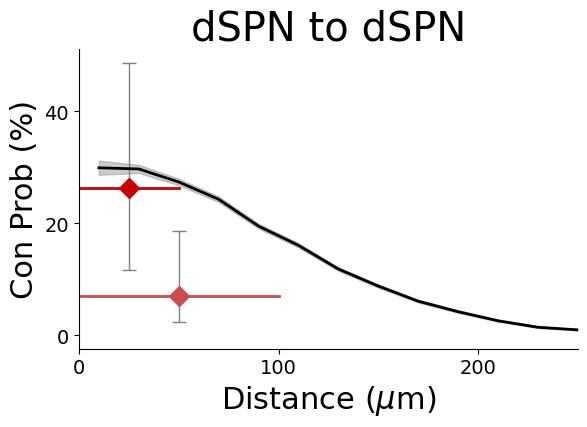

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-dSPN-to-dSPN-synapses-2D-dist.pdf


In [20]:
# Planert et al 2010, Taverna et al 2008
sa.plot_connection_probability("dSPN", "dSPN",
                               dist_3d=dist3D,
                               exp_max_dist=[50e-6, 100e-6],
                               exp_data=[5 / 19.0, 3 / 43.0],
                               exp_data_detailed=[(5, 19), (3, 43)],
                               y_max=y_max_H)

Plotting connection probability dSPN to iSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [394390.]
Rejected (too large z-depth): 542634
P(d<5e-05) = 0.07710227013200567
P(d<0.0001) = 0.06308647221506246


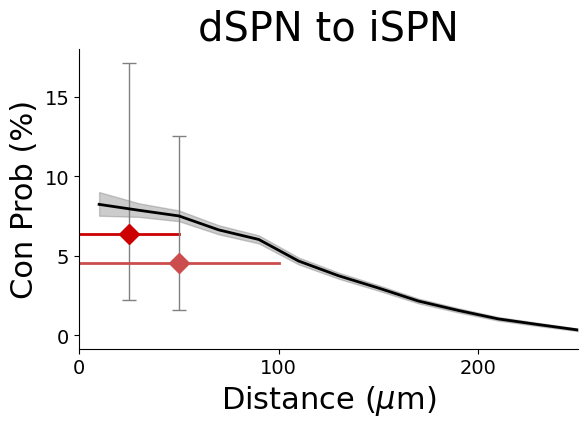

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-dSPN-to-iSPN-synapses-2D-dist.pdf


In [8]:
sa.plot_connection_probability("dSPN", "iSPN",
                               dist_3d=dist3D,
                               exp_max_dist=[50e-6, 100e-6],
                               exp_data=[3 / 47.0, 3 / 66.0],
                               exp_data_detailed=[(3, 47), (3, 66)],
                               y_max=y_max_H)

Plotting connection probability iSPN to dSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [394390.]
Rejected (too large z-depth): 542634
P(d<5e-05) = 0.347645366098753
P(d<0.0001) = 0.27049996865181924


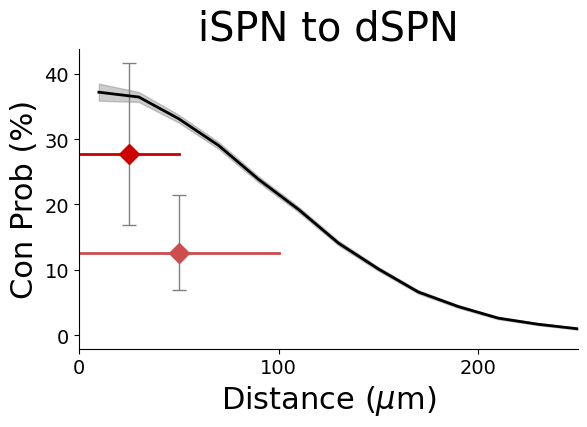

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-iSPN-to-dSPN-synapses-2D-dist.pdf


In [9]:
sa.plot_connection_probability("iSPN", "dSPN",
                                dist_3d=dist3D,
                                exp_max_dist=[50e-6, 100e-6],
                                exp_data=[13 / 47.0, 10 / 80.0],
                                exp_data_detailed=[(13, 47), (10, 80)],
                                y_max=y_max_H)

Plotting connection probability iSPN to iSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [393900.]
Rejected (too large z-depth): 542156
P(d<5e-05) = 0.45369402136849285
P(d<0.0001) = 0.384516539088623


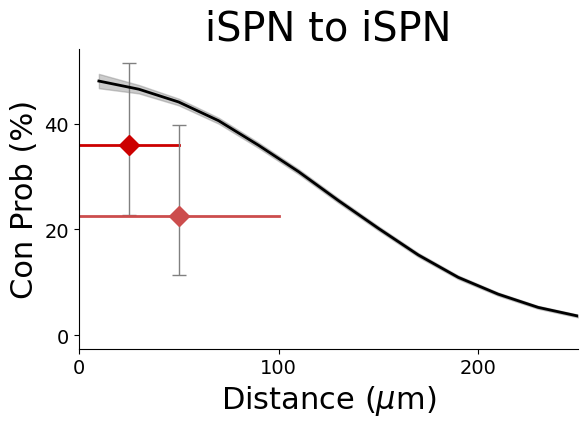

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-iSPN-to-iSPN-synapses-2D-dist.pdf


In [10]:
sa.plot_connection_probability("iSPN", "iSPN",
                               dist_3d=dist3D,
                               exp_max_dist=[50e-6, 100e-6],
                               exp_data=[14 / 39.0, 7 / 31.0],
                               exp_data_detailed=[(14, 39), (7, 31)],
                               y_max=y_max_H)

Plotting connection probability FS to FS (synapses)
Centering in None : Keeping 27/27
Counting connections
Requested: 10000000.0 calculated [278.]
Rejected (too large z-depth): 424
P(d<0.00025) = 0.26639344262295084


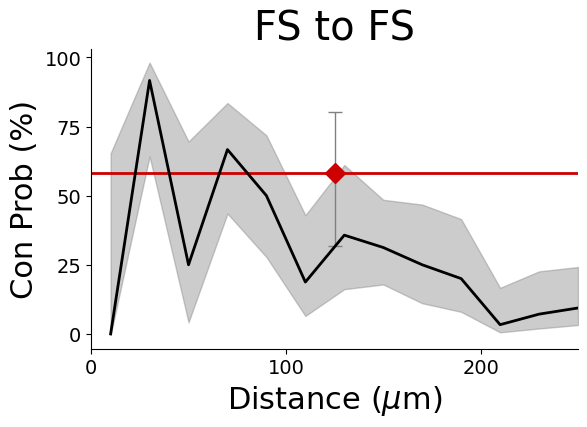

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-FS-to-FS-synapses-2D-dist.pdf


In [11]:
#  Gittis,...,Kreitzer 2010 (p2228) -- 7/12 (and 3/4 reciprocal) -- distance?
# FS->FS synapses weaker, 1.1 +/- 1.5nS
sa.plot_connection_probability("FS", "FS",
                               dist_3d=dist3D,
                               exp_max_dist=[250e-6],
                               exp_data=[7 / 12.0],
                               exp_data_detailed=[(7, 12)])

The next cell is FS-FS gap junction connectivity. This data is from young or juvenlie mice, and adult mice might have lower connectivity (8%?). I will update the tuning for adults soon.

Plotting connection probability FS to FS (gapjunctions)
Centering in None : Keeping 27/27
Counting connections
Requested: 10000000.0 calculated [278.]
Rejected (too large z-depth): 424
P(d<0.00025) = 0.10655737704918032
P(d<0.00025) = 0.10655737704918032


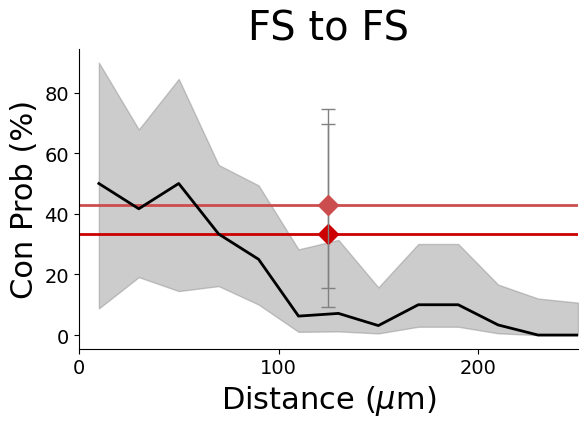

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-FS-to-FS-gapjunctions-2D-dist.pdf


In [12]:
# Koos & Tepper 1999, 2/6
sa.plot_connection_probability("FS", "FS",
                               dist_3d=dist3D,
                               connection_type="gapjunctions",
                               exp_max_dist=[250e-6, 250e-6],
                               exp_data=[2 / 6.0, 3 / 7.0],
                               exp_data_detailed=[(2, 6), (3, 7)], )

Plotting connection probability FS to dSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [10659.]
Rejected (too large z-depth): 15477
P(d<0.0001) = 0.7815464213854556
P(d<0.00015) = 0.6797038162141636
P(d<0.00025) = 0.45081114808652245


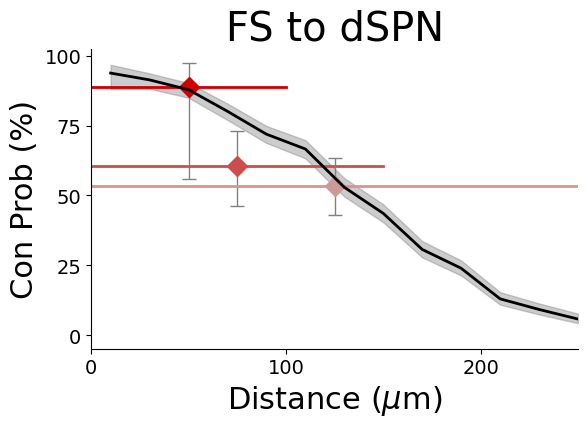

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-FS-to-dSPN-synapses-2D-dist.pdf


In [13]:
sa.plot_connection_probability("FS", "dSPN",
                               dist_3d=dist3D,
                               exp_max_dist=[100e-6, 150e-6, 250e-6],
                               exp_data=[8 / 9.0, 29 / 48.0, 48 / 90.0],
                               exp_data_detailed=[(8, 9), (29, 48), (48, 90)],
                               y_max=None)

Plotting connection probability FS to iSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [10662.]
Rejected (too large z-depth): 15474
P(d<0.0001) = 0.612856731046411
P(d<0.00015) = 0.522182367377761
P(d<0.00025) = 0.3341278889004042


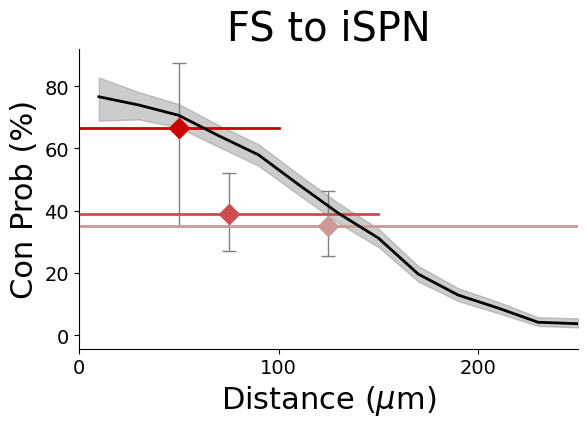

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-FS-to-iSPN-synapses-2D-dist.pdf


In [14]:
sa.plot_connection_probability("FS", "iSPN",
                               dist_3d=dist3D,
                               exp_max_dist=[100e-6, 150e-6, 250e-6],
                               exp_data=[6 / 9.0, 21 / 54.0, 27 / 77.0],
                               exp_data_detailed=[(6, 9), (21, 54), (27, 77)],
                               y_max=None)

Plotting connection probability LTS to dSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [5402.]
Rejected (too large z-depth): 8150
P(d<0.00025) = 0.016842532467532468


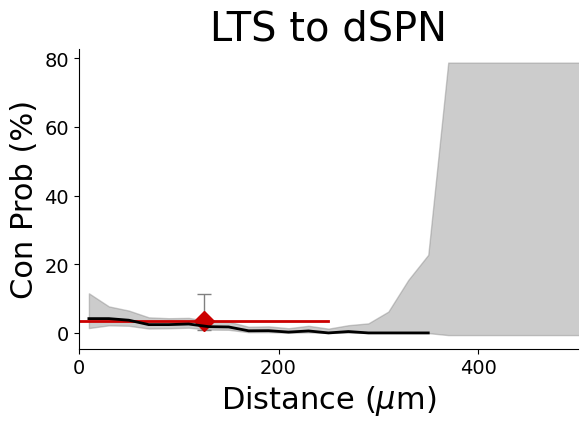

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-LTS-to-dSPN-synapses-2D-dist.pdf


In [15]:
# 3/21 LTS->MS, Basal Ganglia book --- distance??
# Ibanez-Sandoval, ..., Tepper  2011 3/21 -- if patching around visual axon
# but 2/60 when patching blind
sa.plot_connection_probability("LTS", "dSPN",
                               dist_3d=dist3D,
                               exp_max_dist=[250e-6],
                               exp_data=[2 / 60.0],
                               exp_data_detailed=[(2, 60)],
                               x_max=500)

Plotting connection probability LTS to iSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [5480.]
Rejected (too large z-depth): 8072
P(d<0.00025) = 0.018834258524980173


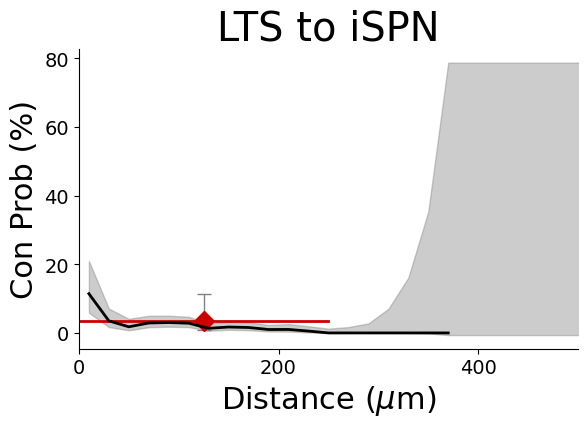

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-LTS-to-iSPN-synapses-2D-dist.pdf


In [16]:
sa.plot_connection_probability("LTS", "iSPN",
                               dist_3d=dist3D,
                               exp_max_dist=[250e-6],
                               exp_data=[2 / 60.0],
                               exp_data_detailed=[(2, 60)],
                               x_max=500)

Plotting connection probability FS to LTS (synapses)
Centering in None : Keeping 14/14
Counting connections
Requested: 10000000.0 calculated [143.]
Rejected (too large z-depth): 235
P(d<0.00025) = 0.112


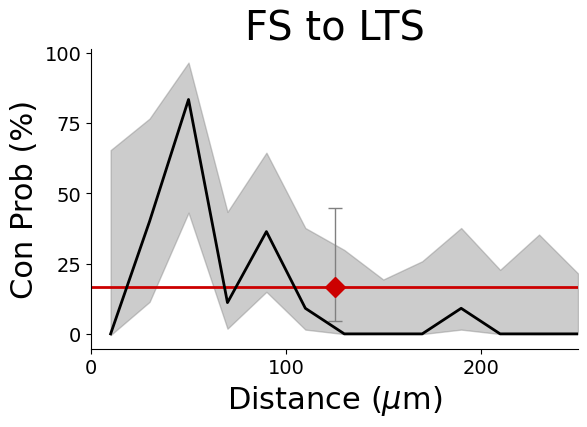

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-FS-to-LTS-synapses-2D-dist.pdf


In [17]:
# Silberberg et al 2013, 2/12 FS-> LTS connected --- distance??
sa.plot_connection_probability("FS", "LTS",
                               dist_3d=dist3D,
                               exp_max_dist=[250e-6],
                               exp_data=[2.0 / 12],
                               exp_data_detailed=[(2, 12)])

Plotting connection probability ChIN to dSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [8800.]
Rejected (too large z-depth): 12496
P(d<0.00025) = 0.0


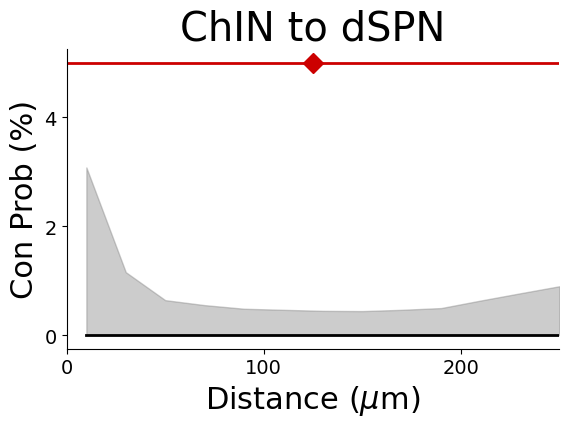

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-ChIN-to-dSPN-synapses-2D-dist.pdf


In [18]:
# Janicova 2015?? --- distance?
sa.plot_connection_probability("ChIN", "dSPN",
                               dist_3d=dist3D,
                               exp_max_dist=[250e-6],
                               exp_data=[0.05])

Plotting connection probability ChIN to iSPN (synapses)
Centering in None : Keeping 968/968
Counting connections
Requested: 10000000.0 calculated [8886.]
Rejected (too large z-depth): 12410
P(d<0.00025) = 0.0


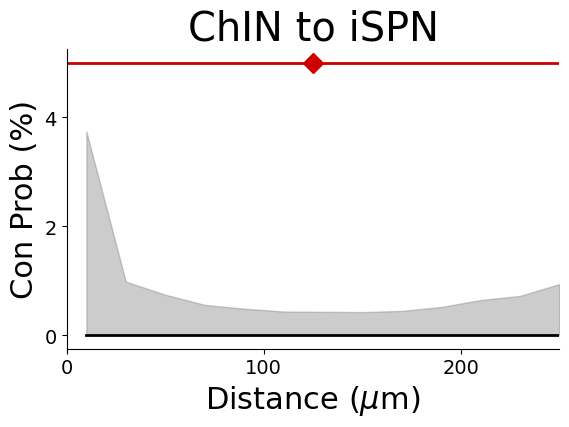

Wrote networks/connectivity_validation/figures/Network-distance-dependent-connection-probability-ChIN-to-iSPN-synapses-2D-dist.pdf


In [19]:
sa.plot_connection_probability("ChIN", "iSPN",
                               dist_3d=dist3D,
                               exp_max_dist=[250e-6],
                               exp_data=[0.05])